In [ ]:
!pip install kmeans1d



import numpy as np
import random
import multiprocessing
import kmeans1d
import yfinance as yf
import math
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LinearRegression




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
###Hyperparameters

NUM_PRICE_POINTS = 10

PARAM_CONSTANT = 3

PARAM_EQ_THRESH = 0.1

NUM_PARAMS = NUM_PRICE_POINTS - PARAM_CONSTANT + 1

PMF_FOR_PARAMETERS = increasing_distribution(NUM_PARAMS, 0.02)

ER_THRESH = 0.7

PORTFOLIO_LEN = 30

BOOTSTRAP_SIZE = 400

NUM_CLUSTERS = 3

In [ ]:
SYMBOLS = np.array(["AIMD", "BACK", "LINK",
                    "AFRM",  "MCVT", "HUT", "BITF", "HIVE", "UPST",
                    "SDIG", "COIN", "CFLT", "HCP", "TSP", "DGHI", "U", "COMP", "LSPD",
                    "SEER", "GTLB", "WISH", "FNCH", "FUBO", "ACCD", "OPEN", "ASAN", "NXU",
                    "GLBE", "NVTA", "IONQ", "CVNA", "DNA", "CETY", "RIVN", "FLNC",
                    "MARA", "GREE", "RENT", "TASK", "VLD", "SKYT", "VTLE", "DOCN", "TOST",
                    "SANA", "KC", "MDXG", "BRZE", "HYFM", "MNDY", "BKKT", "LAW", "REAL", "SLQT",
                    "AI", "BMBL", "NVEI", "MTTR", "BIGC", "MQ", "CZR", "IREN", "MSGM", "AMPL",
                    "STEM", "RBLX", "APP", "VRM", "ENVX", "RIOT", "W", "NVTS", "AUR", "LMND", "BHG", "S",
                    "DLO", "WRBY", "SEV", "JMIA", "FTCI", "FLYW", "VERV", "GTE", "APPS", "FRSH", "USEA", "RXRX", "PATH", "ABSI", "SLI"])



PRICE_DATA = np.array([prices(security) for security in SYMBOLS])

ERROR:yfinance:GTE: No price data found, symbol may be delisted (period=6mo)
<ipython-input-28-9b67084c2884>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  PRICE_DATA = np.array([prices(security) for security in SYMBOLS])


In [ ]:
print(PMF_FOR_PARAMETERS)


a = increasing_distribution(26, 0.02)

x = [i for i in range(0,26)]
plt.scatter(x, increasing_dist_with_softmax(26, 0.1))
plt.scatter(x, a)
plt.show()

lengths = [len(sec) for sec in PRICE_DATA]
m = np.max(lengths)


for i in range(len(PRICE_DATA)):
  if lengths[i] < m:
    print(SYMBOLS[i])

print("")
print(lengths)

NameError: ignored

SECURITIES: ['GREE' 'SDIG' 'RIVN' 'VRM' 'REAL' 'OPEN' 'IREN' 'ENVX' 'IONQ' 'CVNA'
 'RIOT' 'HUT' 'HIVE' 'BKKT' 'FTCI' 'AI' 'BITF' 'COIN' 'UPST' 'MARA' 'DOCN'
 'FUBO' 'AUR' 'APPS' 'STEM' 'NVTS' 'DGHI' 'FNCH' 'JMIA' 'DNA']
Best Profit seen so far updated: 2.628220084061925%. ER: 31.579552396163713
Best ER seen so far updated:  31.579552396163713. Profit: 2.628220084061925%
Highest seen ER aligned with highest seen Profit 1 times so far.
Best ER seen so far updated:  124.26333860668743. Profit: -4.104520602032858%
Best Profit seen so far updated: 10.179967928813761%. ER: 66.12651475572466
Best ER seen so far updated:  126.97719868832873. Profit: -0.39834228302768415%
Best Profit seen so far updated: 10.269441770719787%. ER: 86.40708055595113
Best Profit seen so far updated: 15.135548805506168%. ER: 59.098743278560065
Best Profit seen so far updated: 17.28473810870788%. ER: 69.94100727264444
Best Profit seen so far updated: 19.57579195625211%. ER: 79.20926882909254
Best Profit seen so far u

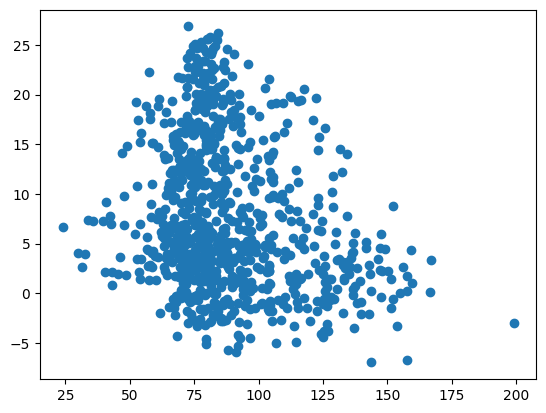

Coefficient of determination between ER and Profit: 0.05516689902556027
MAX PROFIT WEEK 0 + : (array([0.06, 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.16,
       0.  , 0.16, 0.  , 0.  , 0.2 , 0.  , 0.06, 0.1 ]), 72.44166687248051, 26.852310079294078)
MAX ER WEEK 0 + : (array([0.1 , 0.12, 0.2 , 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.08,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 ]), 198.96161385759157, -2.9980718005633795)
Difference between our profit and optimal profit this week: -995.6526682999438
Profits so far: [-2.9980718005633795]
Optimal profits so far: [26.852310079294078]

SECURITIES: ['GREE' 'RXRX' 'ABSI' 'VRM' 'CVNA' 'BKKT' 'SDIG' 'WISH' 'TSP' 'DNA' 'FUBO'
 'DGHI' 'DOCN' 'RIOT' 'SEER' 'BMBL' 'AIMD' 'APPS' 'JMIA' 'UPST' 'HYFM'
 'IREN' 'NVTA' 'STEM' 'TOST' 'NVEI' 'APP' 'DLO' 'WRBY' 'ENVX']


IndexError: ignored

In [ ]:
def backtest():

  ###ASSUMPTIONS: We enter the position at the price indexed by i + num_price_points. If we're using 20 price points to make our prediction, we send in
  ### 21 prices and consider the 21st to be our buy price. Exit is price is variable and sent in as a separate argument.

  cumulative_ER_based_profit = []
  cumulative_optimal_profit = []
  exit_interval = 5
  for i in range(0, len(PRICE_DATA[0]), (exit_interval)): ###Strategy starts when we have num_price_points weeks of data

    scores = [SecurityScore(PRICE_DATA[j][i : i + NUM_PRICE_POINTS + 1]) for j in range(0,len(PRICE_DATA))]
    ### Calculate scores for the securities based off of this week's data

    sorted_indeces = np.argsort(scores)[::-1][:PORTFOLIO_LEN]
    securities_of_the_week = PRICE_DATA[sorted_indeces]
    symbols = SYMBOLS[sorted_indeces]
    print("SECURITIES: " + str(symbols))

    running_max_overall = ((), 0, 0)
    running_max_ER = ((), 0, 0)
    portfolio_vectors = generate_portfolios_with_zeros(PORTFOLIO_LEN, 8, 20000, 15)
    ER_for_regression = []
    Profit_for_regression = []

    coefficients = []
    unoptimalities = []

    cc = 0


    input_prices = [price[i : i + NUM_PRICE_POINTS + 1] for price in securities_of_the_week]
    exit = [price[i + NUM_PRICE_POINTS + exit_interval] for price in securities_of_the_week]
    for portfolio in portfolio_vectors:

      er_update = False
      profit_update = False

      ret_tuple = ERandProbability_BACKTEST(input_prices, portfolio, exit)
      if ret_tuple is None:
        continue

      ER_for_regression.append(ret_tuple[1])
      Profit_for_regression.append(ret_tuple[2])


      if (ret_tuple[2] > running_max_overall[2]):

        profit_update = True
        running_max_overall = ret_tuple
        print(f"Best Profit seen so far updated: {ret_tuple[2]}%. ER: {ret_tuple[1]}")

      if (ret_tuple[1] > running_max_ER[1]):

        er_update = True
        running_max_ER = ret_tuple
        print(f"Best ER seen so far updated:  {ret_tuple[1]}. Profit: {ret_tuple[2]}%")

      if (er_update and profit_update):

        cc += 1
        print("Highest seen ER aligned with highest seen Profit " + str(cc) + " times so far.")

    if (len(ER_for_regression) == 0):
      print("Shit market")
      continue
    x = np.array(ER_for_regression)
    y = np.array(Profit_for_regression)

    plt.scatter(x,y)
    plt.show()
    x = x.reshape((-1,1))
    model = LinearRegression()
    model.fit(x,y)
    r_sq = model.score(x, y)
    coefficients.append(r_sq)
    cumulative_ER_based_profit.append(running_max_ER[2])
    cumulative_optimal_profit.append(running_max_overall[2])
    print(f"Coefficient of determination between ER and Profit: {r_sq}")
    print(f"MAX PROFIT WEEK {i} + : {running_max_overall}")
    print(f"MAX ER WEEK {i} + : {running_max_ER}")
    unop = ((running_max_overall[2] - running_max_ER[2])/running_max_ER[2])*100
    unoptimalities.append(unop)
    print(f"Difference between our profit and optimal profit this week: {unop}")
    print(f"Profits so far: {cumulative_ER_based_profit}")
    print(f"Optimal profits so far: {cumulative_optimal_profit}")


    print("")



  print(f"Mean difference between our profit and optimal portfolio profit: + {np.mean(unoptimalities)}")
  print(np.mean(coefficients))
  return

backtest()

In [ ]:
#@title Expected Return through Dot Product
def ERandProbability(price_data, portfolio):

  if len(price_data) != len(portfolio):
      raise ValueError("Number of arrays must match the number of weights.")


  ###REDACTED 


In [ ]:
#@title Expected Return Backtest
def ERandProbability_BACKTEST(price_data, portfolio, exit):

  if len(price_data) != len(portfolio):
      raise ValueError("Number of arrays must match the number of weights.")


  portfolio_prices = np.sum([w * array for w, array in zip(portfolio, price_data)], axis=0)
  exit_price = np.sum([w * array for w, array in zip(portfolio, exit)], axis=0)

  buy_price = portfolio_prices[-1]
  portfolio_prices = portfolio_prices[:-1]
  profit = ((exit_price - buy_price)/buy_price) * 100




  ##REDACTED


  ER = np.array(centroids)
  prob = np.array([counts[i]/len(clusters) for i in range(0, NUM_CLUSTERS)])
  param_validity_cutoff = int(np.rint(len(data) / 3))

  if (prob[densest_band] < 0.50):
    return None
  if np.sum(data[:-(param_validity_cutoff)]) < 0:
    return None
  else:

    score = np.dot(ER, prob)
    ###score = ER[densest_band] * prob[densest_band]
    ###score = ER[densest_band]
    return (portfolio, score, profit)

In [ ]:
#@title Security Score
def SecurityScore(prices):

  ###REDACTED


In [ ]:
#@title Parameter Generation
def generate_parameters(prices, k, thresh):
    ###REDACTED


In [ ]:
#@title Multiplier Legend
def multiplier(data, thresh):
  ###REDACTED


In [ ]:
def bootstrap(data, num_iter, px):
  ret = np.empty(shape=num_iter)
  for i in range(0, num_iter):
    ret[i] = np.sum(np.random.choice(data, len(data), px))
  return ret

Clustering: using kmeans

In [ ]:
def cluster(data, num_clusters):
  return kmeans1d.cluster(data, num_clusters)

In [ ]:
def prices(security):
  return np.array(yf.Ticker(security).history(period="6mo", interval="1d", actions=False)['Open'].tolist())[20:]



Increasing probability distribution on k elements. smaller w --> distribution is closer to uniform






In [ ]:
#@title Generate our Increasing Probability Distribution
def increasing_distribution(k, w):
  assert (w < (1/k))
  start = [1/k for i in range(0,k)]
  for i in range(0,k):

    start[i] -= w
    for j in range(i+1,k):
      start[j] += (w/(k-i))

  correction_factor = (1 - sum(start))/k
  dist = []
  for elt in start:
    dist.append((elt+correction_factor))

  x = dist
  y = [i for i in range(len(dist))]

  return dist




In [ ]:
from numpy.lib import arrayterator
#@title Generate Portfolio Vectors
def generate_portfolios(size, lim, num_portfolios):
    result = []
    assert(lim < 50)
    while len(result) < num_portfolios:
        array = np.random.randint(3, lim, size=size) * 2 ### any given asset holds at most lim * 2)% share, all quantities are even and stay even.
        if np.sum(array) < 100:
          array += 10
        while np.sum(array) > 100:
            idx = np.random.randint(0, size)
            if array[idx] > 2:
              array[idx] -= 2

        assert (np.sum(array) == 100)
        result.append(array/100)

    result = np.array(result)
    result = np.unique(result, axis=0)


    return result


def generate_portfolios_with_zeros(total_size, num_non_zeros, num_portfolios, lim):
  result = []
  while len(result) < num_portfolios:
    portfolio = np.random.randint(3, lim, size=num_non_zeros) * 2 ### any given asset holds at most lim * 2)% share, all quantities are even and stay even.
    while (np.sum(portfolio) < 100):
      portfolio += 10
    while np.sum(portfolio) > 100:
        idx = np.random.randint(0, num_non_zeros)
        if portfolio[idx] > 2:
          portfolio[idx] -= 2

    assert (np.sum(portfolio) == 100)
    nonzeros = portfolio/100

    tmp = np.zeros(total_size)
    non_zero_indeces = random.sample(range(0, total_size), num_non_zeros)


    i=0
    for idx in non_zero_indeces:
      tmp[idx] = nonzeros[i]
      i+=1


    result.append(tmp)


  ###result = np.array(result)
  ###result = np.unique(result, axis=0)
  return result






In [ ]:
def softmax(x):
  return(np.exp(x - np.max(x)) / np.exp(x - np.max(x)).sum())

def increasing_dist_with_softmax(k, step):
  arr = np.zeros(k)
  arr[0] = 1.0
  for i in range(1, k):
    arr[i] = arr[i-1] + step

  ret = softmax(arr)
  error = 1 - np.sum(ret)
  ret[-1] = ret[-1] + error

  assert np.sum(ret) == 1
  return list(ret)

